# Customer Churn Prediction:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset:-

In [2]:
cc=pd.read_csv('Customer_Churn.csv')
cc

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
cc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
cc.shape

(7043, 21)

In [5]:
cc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
cc.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data Cleaning:-

In [7]:
cc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Above observations shows that there are no null values present in this dataset.

In [8]:
cc.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Observations shows that some columns are integer and float type and rest are object type.

In [12]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
cc['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [3]:
cc.loc[cc['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Above observation shows that there are some blank values in TotalCharges column.

In [4]:
cc['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [5]:
cc['TotalCharges'] = cc['TotalCharges'].replace(' ', np.nan)
cc['TotalCharges'] = pd.to_numeric(cc['TotalCharges'])

In [5]:
cc

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [6]:
cc['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [ ]:
# now, we can  see that the TotalCharges column has some space values which is replaced by nan values. 
# Handling the Nan values and it with the mean of the column, as the column is continuous in nature.

In [7]:
np.mean(cc['TotalCharges'])

2283.3004408418697

In [8]:
cc['TotalCharges']=cc['TotalCharges'].fillna(np.mean(cc['TotalCharges']))

In [9]:
cc['TotalCharges'].dropna()

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
cc

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [38]:
cc.shape

(7043, 21)

# EDA:-

Data Visualization:-

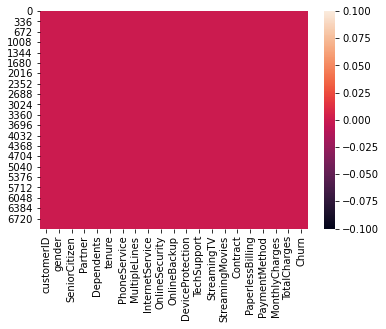

In [11]:
sns.heatmap(cc.isnull())
plt.show()

This above heatmap displays that null values are present in this dataset.

In [41]:
cc['Churn'].describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

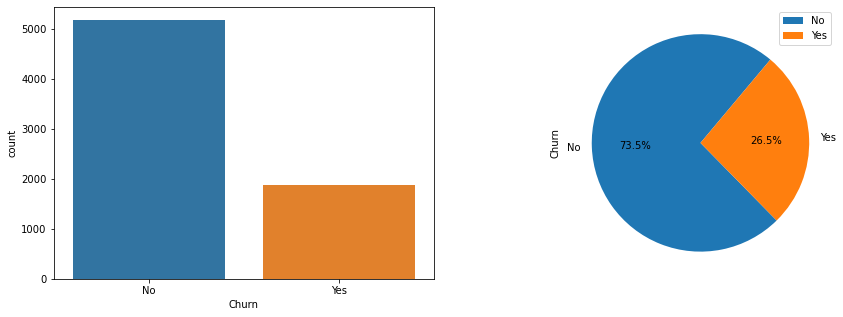

In [46]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
plt1 = sns.countplot(cc['Churn'], ax = axs[0])

pie_churn = pd.DataFrame(cc['Churn'].value_counts())
pie_churn.plot.pie( subplots=True,labels = pie_churn.index.values, autopct='%1.1f%%', 
                   figsize = (15,5), startangle= 50, ax = axs[1])

# Unsquish the pie.

plt.gca().set_aspect('equal')

plt.show()

The countplot shows that there are three times more records in churn-no class than in churn-yes class, means the dataset 
is imbalanced and We have a data with 27% churn rate.

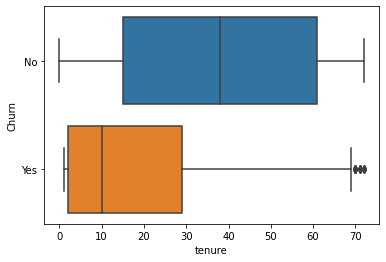

In [12]:
sns.boxplot(x = 'tenure', y = 'Churn', data = cc)
plt.show()

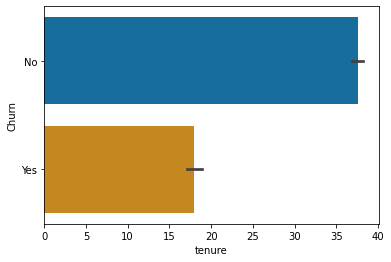

In [17]:
sns.barplot(x=cc['tenure'],y=cc['Churn'], palette='colorblind')
plt.show()

Customer with more tenure tends to churn less.

In [19]:
cc['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

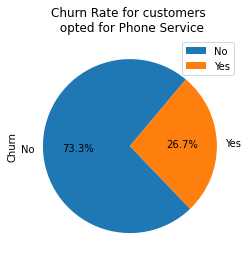

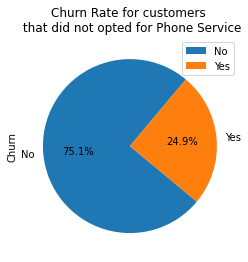

In [18]:
pie_PhoneService_Yes = pd.DataFrame(cc[cc['PhoneService'] == "Yes"]['Churn'].value_counts())
pie_PhoneService_Yes.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Churn Rate for customers \n opted for Phone Service')
plt.gca().set_aspect('equal')

pie_PhoneService_No = pd.DataFrame(cc[cc['PhoneService'] == "No"]['Churn'].value_counts())
pie_PhoneService_No.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Churn Rate for customers \n that did not opted for Phone Service')
plt.gca().set_aspect('equal')

plt.show() 

Opting for phone service does not have a significant impact on churn rate.

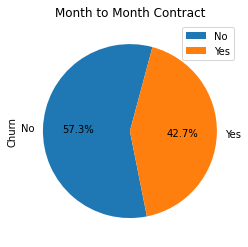

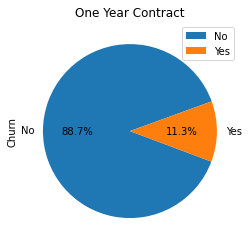

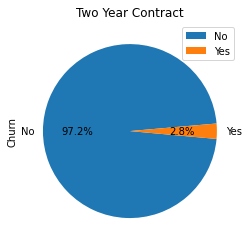

In [20]:
pie_Contract_m2m = pd.DataFrame(cc[cc['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(cc[cc['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(cc[cc['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

Customers with One Year and Two year contract tends to Churn a lot lesser than month to month contract.

<Figure size 1080x360 with 0 Axes>

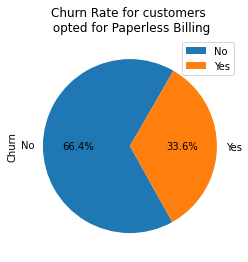

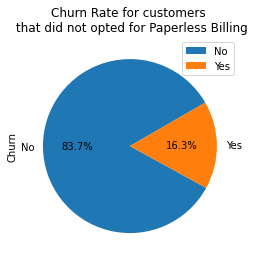

In [24]:
plt.figure(figsize=(15,5))

pie_PaperlessBilling_Yes = pd.DataFrame(cc[cc['PaperlessBilling'] == "Yes"]['Churn'].value_counts())
pie_PaperlessBilling_Yes.plot.pie(subplots=True, labels = pie_PaperlessBilling_Yes.index.values,
                                 autopct='%1.1f%%', startangle= 60)
plt.title('Churn Rate for customers \n opted for Paperless Billing')
plt.gca().set_aspect('equal')


pie_PaperlessBilling_No = pd.DataFrame(cc[cc['PaperlessBilling'] == "No"]['Churn'].value_counts())
pie_PaperlessBilling_No.plot.pie(subplots=True, labels = pie_PaperlessBilling_No.index.values,
                                 autopct='%1.1f%%', startangle= 30)
plt.title('Churn Rate for customers \n that did not opted for Paperless Billing')

plt.gca().set_aspect('equal')

plt.show()

Churn Rate is higher for the customers who opted for paperless billing.

<Figure size 1080x720 with 0 Axes>

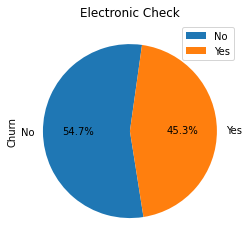

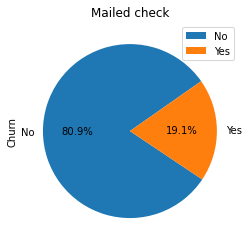

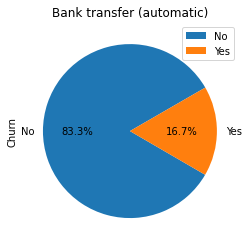

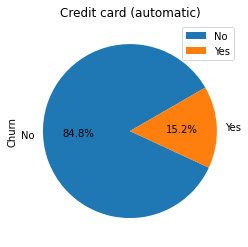

In [25]:
plt.figure(figsize=(15,10))
pie_PaymentMethod_ec = pd.DataFrame(cc[cc['PaymentMethod'] == "Electronic check"]['Churn'].value_counts())
pie_PaymentMethod_ec.plot.pie(subplots=True, labels = pie_PaymentMethod_ec.index.values, autopct='%1.1f%%', startangle= 82)
plt.title('Electronic Check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_mc = pd.DataFrame(cc[cc['PaymentMethod'] == "Mailed check"]['Churn'].value_counts())
pie_PaymentMethod_mc.plot.pie(subplots=True, labels = pie_PaymentMethod_mc.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Mailed check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_bta = pd.DataFrame(cc[cc['PaymentMethod'] == "Bank transfer (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_bta.plot.pie(subplots=True, labels = pie_PaymentMethod_bta.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Bank transfer (automatic)')
plt.gca().set_aspect('equal')

pie_PaymentMethod_cca = pd.DataFrame(cc[cc['PaymentMethod'] == "Credit card (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_cca.plot.pie(subplots=True, labels = pie_PaymentMethod_cca.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Credit card (automatic)')
plt.gca().set_aspect('equal')

plt.show()

Customers with Electronic Check tends to churn more than other payment methods.

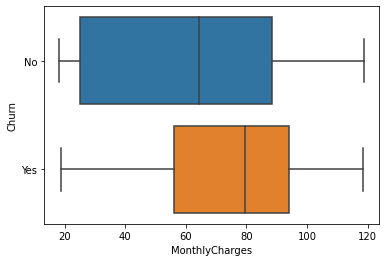

In [29]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data = cc)
plt.show()

Median Monthly charges are higher for customers who have churned.

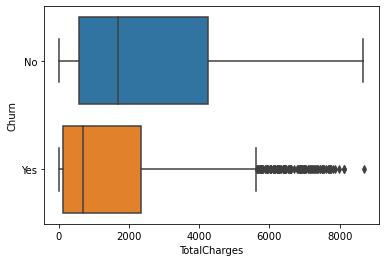

In [30]:
sns.boxplot(x = 'TotalCharges', y = 'Churn', data = cc)
plt.show()

 Median Total charges are low for customers who have churned.

<Figure size 1080x360 with 0 Axes>

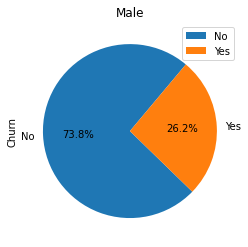

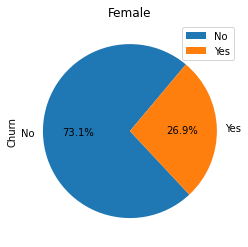

In [32]:
plt.figure(figsize=(15,5))
pie_Gender_M = pd.DataFrame(cc[cc['gender'] == "Male"]['Churn'].value_counts())
pie_Gender_M.plot.pie(subplots = True, labels = pie_Gender_M.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Male')
plt.gca().set_aspect('equal')

pie_Gender_F =pd.DataFrame(cc[cc['gender'] == "Female"]['Churn'].value_counts())
pie_Gender_F.plot.pie(subplots = True,  labels = pie_Gender_F.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Female')

plt.gca().set_aspect('equal')
plt.show() 

There is no effect of Gender on Churn.

<Figure size 1080x360 with 0 Axes>

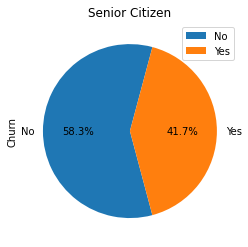

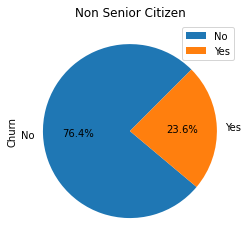

In [33]:
plt.figure(figsize=(15,5))
pie_SeniorCitizen_Y = pd.DataFrame(cc[cc['SeniorCitizen'] == 1]['Churn'].value_counts())
pie_SeniorCitizen_Y.plot.pie(subplots = True, labels = pie_SeniorCitizen_Y.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Senior Citizen')
plt.gca().set_aspect('equal')

pie_SeniorCitizen_N = pd.DataFrame(cc[cc['SeniorCitizen'] == 0]['Churn'].value_counts())
pie_SeniorCitizen_N.plot.pie(subplots = True, labels = pie_SeniorCitizen_N.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Non Senior Citizen')

plt.gca().set_aspect('equal')
plt.show()

 Senior Citizens tends to churn more.

<Figure size 1080x360 with 0 Axes>

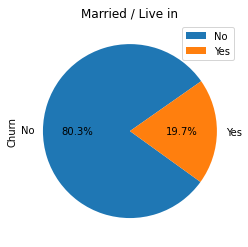

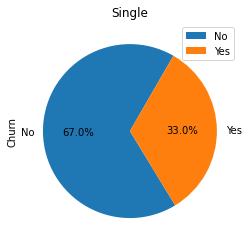

In [34]:
plt.figure(figsize=(15,5))
pie_Partner_Y = pd.DataFrame(cc[cc['Partner'] == 'Yes']['Churn'].value_counts())
pie_Partner_Y.plot.pie(subplots = True,  labels = pie_Partner_Y.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Married / Live in')
plt.gca().set_aspect('equal')

pie_Partner_N = pd.DataFrame(cc[cc['Partner'] == 'No']['Churn'].value_counts())
pie_Partner_N.plot.pie(subplots = True,  labels = pie_Partner_N.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('Single')

plt.gca().set_aspect('equal')
plt.show() 

Singles have higher churn rate.

<Figure size 1080x360 with 0 Axes>

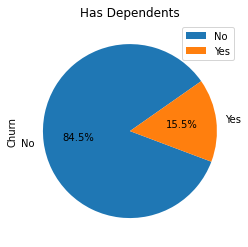

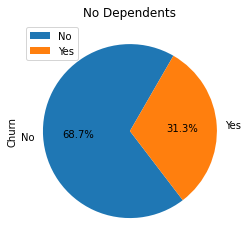

In [35]:
plt.figure(figsize=(15,5))
pie_Dependents_Y = pd.DataFrame(cc[cc['Dependents'] == 'Yes']['Churn'].value_counts())
pie_Dependents_Y.plot.pie(subplots = True,  labels = pie_Dependents_Y.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Has Dependents')
plt.gca().set_aspect('equal')

pie_Dependents_N = pd.DataFrame(cc[cc['Dependents'] == 'No']['Churn'].value_counts())
pie_Dependents_N.plot.pie(subplots = True,  labels = pie_Dependents_N.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('No Dependents')

plt.gca().set_aspect('equal')
plt.show() 

Customers with no dependents tends to churn more.

<Figure size 1080x360 with 0 Axes>

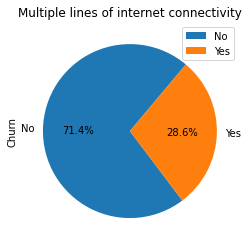

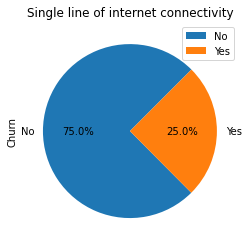

In [36]:
plt.figure(figsize=(15,5))
pie_MultipleLines_Y = pd.DataFrame(cc[cc['MultipleLines'] == 'Yes']['Churn'].value_counts())
pie_MultipleLines_Y.plot.pie(subplots = True,  labels = pie_MultipleLines_Y.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Multiple lines of internet connectivity')
plt.gca().set_aspect('equal')

pie_MultipleLines_N = pd.DataFrame(cc[cc['MultipleLines'] == 'No']['Churn'].value_counts())
pie_MultipleLines_N.plot.pie(subplots = True,  labels = pie_MultipleLines_N.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Single line of internet connectivity')

plt.gca().set_aspect('equal')
plt.show() 

Multiple lines of internet connectivity doesn't effect churn that much.

<Figure size 1080x360 with 0 Axes>

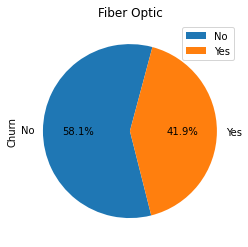

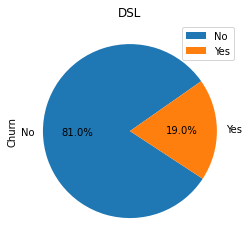

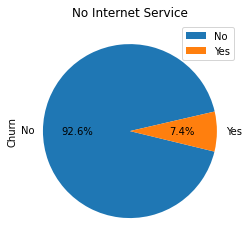

In [37]:
plt.figure(figsize=(15,5))
pie_InternetService_fo = pd.DataFrame(cc[cc['InternetService'] == "Fiber optic"]['Churn'].value_counts())
pie_InternetService_fo.plot.pie(subplots = True, labels = pie_InternetService_fo.index.values,
                                autopct='%1.1f%%', startangle= 75)
plt.title('Fiber Optic')
plt.gca().set_aspect('equal')

pie_InternetService_dsl = pd.DataFrame(cc[cc['InternetService'] == "DSL"]['Churn'].value_counts())
pie_InternetService_dsl.plot.pie(subplots = True, labels = pie_InternetService_dsl.index.values, 
                                 autopct='%1.1f%%', startangle= 35)
plt.title('DSL')
plt.gca().set_aspect('equal')

pie_InternetService_no = pd.DataFrame(cc[cc['InternetService'] == "No"]['Churn'].value_counts())
pie_InternetService_no.plot.pie(subplots = True, labels = pie_InternetService_no.index.values, 
                                autopct='%1.1f%%', startangle= 13)
plt.title('No Internet Service')
plt.gca().set_aspect('equal')

plt.show()

Customers with Fiber Optic Connection churn the most whereas least probability of churning for those with no internet service.

<Figure size 1080x360 with 0 Axes>

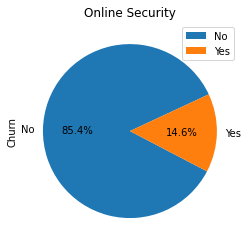

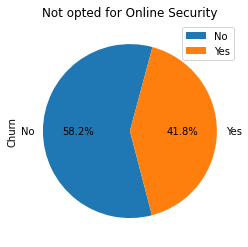

In [38]:
plt.figure(figsize=(15,5))
pie_OnlineSecurity_Y = pd.DataFrame(cc[cc['OnlineSecurity'] == 'Yes']['Churn'].value_counts())
pie_OnlineSecurity_Y.plot.pie(subplots = True,  labels = pie_OnlineSecurity_Y.index.values,
                              autopct='%1.1f%%', startangle= 25)
plt.title('Online Security')
plt.gca().set_aspect('equal')

pie_OnlineSecurity_N = pd.DataFrame(cc[cc['OnlineSecurity'] == 'No']['Churn'].value_counts())
pie_OnlineSecurity_N.plot.pie(subplots = True, labels = pie_OnlineSecurity_N.index.values,
                              autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Security')
plt.gca().set_aspect('equal')
plt.show() 

Customers opted for Online Security churn less than who have not opted.

<Figure size 1080x360 with 0 Axes>

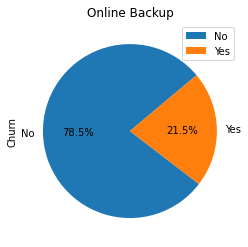

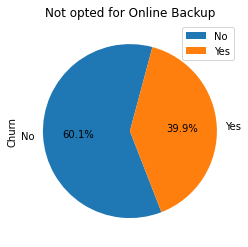

In [39]:
plt.figure(figsize=(15,5))
pie_OnlineBackup_Y = pd.DataFrame(cc[cc['OnlineBackup'] == 'Yes']['Churn'].value_counts())
pie_OnlineBackup_Y.plot.pie(subplots = True,  labels = pie_OnlineBackup_Y.index.values, autopct='%1.1f%%', startangle= 40)
plt.title('Online Backup')
plt.gca().set_aspect('equal')

pie_OnlineBackup_N = pd.DataFrame(cc[cc['OnlineBackup'] == 'No']['Churn'].value_counts())
pie_OnlineBackup_N.plot.pie(subplots = True, labels = pie_OnlineBackup_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Backup')
plt.gca().set_aspect('equal')

plt.show() 

Customers opted for Online Backup churn less than who have not opted.

<Figure size 1080x360 with 0 Axes>

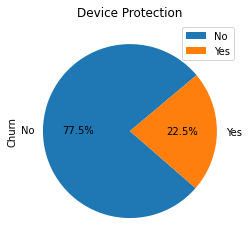

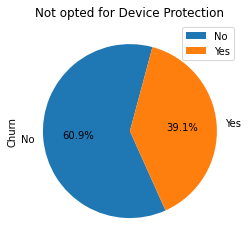

In [42]:
plt.figure(figsize=(15,5))

pie_DeviceProtection_Y = pd.DataFrame(cc[cc['DeviceProtection'] == 'Yes']['Churn'].value_counts())
pie_DeviceProtection_Y.plot.pie(subplots = True, labels = pie_DeviceProtection_Y.index.values,
                                autopct='%1.1f%%', startangle= 40)
plt.title('Device Protection')
plt.gca().set_aspect('equal')

pie_DeviceProtection_N = pd.DataFrame(cc[cc['DeviceProtection'] == 'No']['Churn'].value_counts())
pie_DeviceProtection_N.plot.pie(subplots = True, labels = pie_DeviceProtection_N.index.values, 
                                autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Device Protection')
plt.gca().set_aspect('equal')
plt.show() 

Customers opted for Device Potection churn less than who have not opted.

<Figure size 1080x360 with 0 Axes>

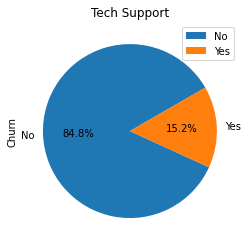

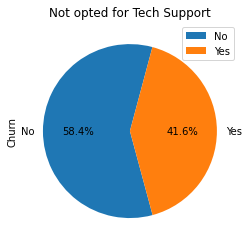

In [43]:
plt.figure(figsize=(15,5))
pie_TechSupport_Y = pd.DataFrame(cc[cc['TechSupport'] == 'Yes']['Churn'].value_counts())
pie_TechSupport_Y.plot.pie(subplots = True,labels = pie_TechSupport_Y.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Tech Support')
plt.gca().set_aspect('equal')

pie_TechSupport_N = pd.DataFrame(cc[cc['TechSupport'] == 'No']['Churn'].value_counts())
pie_TechSupport_N.plot.pie(subplots = True, labels = pie_TechSupport_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Tech Support')

plt.gca().set_aspect('equal')
plt.show() 

Customers opted for Tech Support churn less than who have not opted.

<Figure size 1080x360 with 0 Axes>

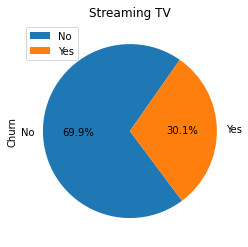

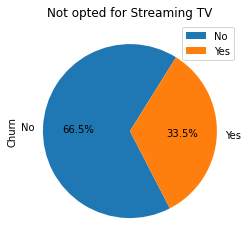

In [44]:
plt.figure(figsize=(15,5))
pie_StreamingTV_Y = pd.DataFrame(cc[cc['StreamingTV'] == 'Yes']['Churn'].value_counts())
pie_StreamingTV_Y.plot.pie(subplots = True, labels = pie_StreamingTV_Y.index.values, autopct='%1.1f%%', startangle= 55)
plt.title('Streaming TV')
plt.gca().set_aspect('equal')

pie_StreamingTV_N = pd.DataFrame(cc[cc['StreamingTV'] == 'No']['Churn'].value_counts())
pie_StreamingTV_N.plot.pie(subplots = True,labels = pie_StreamingTV_N.index.values, autopct='%1.1f%%', startangle= 58)
plt.title('Not opted for Streaming TV')
plt.gca().set_aspect('equal')

plt.show() 

Streaming TV doesn't make such impact on churning.

<Figure size 1080x360 with 0 Axes>

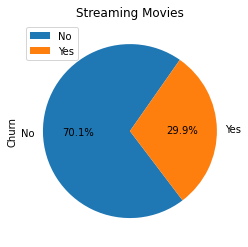

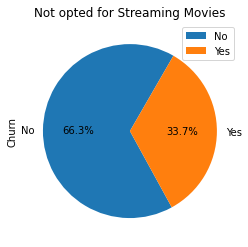

In [46]:
plt.figure(figsize=(15,5))
pie_StreamingMovies_Y = pd.DataFrame(cc[cc['StreamingMovies'] == 'Yes']['Churn'].value_counts())
pie_StreamingMovies_Y.plot.pie(subplots = True, labels = pie_StreamingMovies_Y.index.values,
                               autopct='%1.1f%%', startangle= 55)
plt.title('Streaming Movies')
plt.gca().set_aspect('equal')

pie_StreamingMovies_N = pd.DataFrame(cc[cc['StreamingMovies'] == 'No']['Churn'].value_counts())
pie_StreamingMovies_N.plot.pie(subplots = True, labels = pie_StreamingMovies_N.index.values, 
                               autopct='%1.1f%%', startangle= 60)
plt.title('Not opted for Streaming Movies')
plt.gca().set_aspect('equal')

plt.show()

Streaming Movies doesn't make such impact on churning.

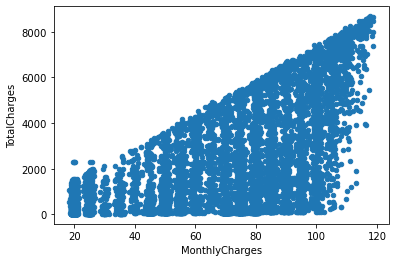

In [47]:
# Now let's take a quick look at the relation between monthly and total charges;

cc[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')
plt.show()

We will observe that the total charges increases as the monthly bill for a customer increases.

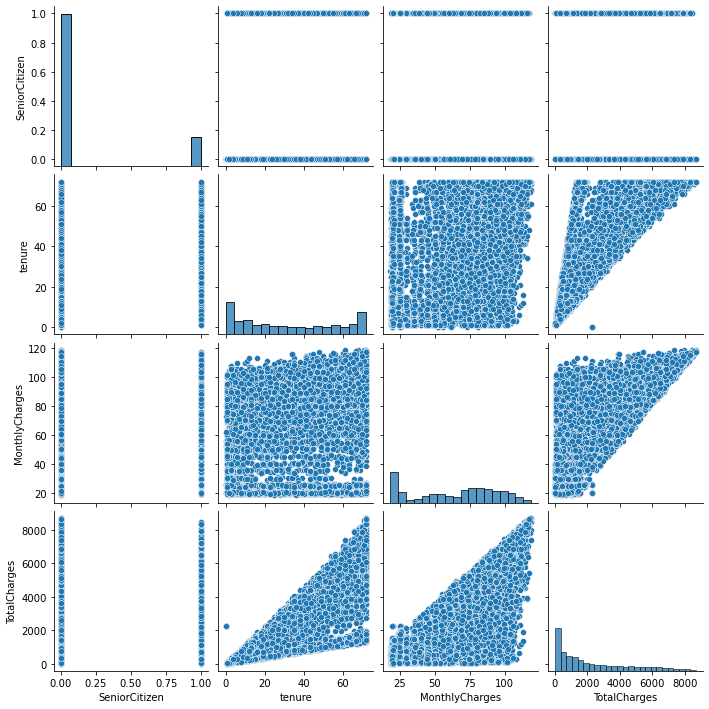

In [13]:
# Creating a pairplot of dataset

sns.pairplot(cc)
plt.show()

In [14]:
cc.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
# changing the datatypes;

from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

val=['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
     'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
     'PaymentMethod','Churn']
for i in val:
    cc[i]=le.fit_transform(cc[i])

In [18]:
cc

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [19]:
cc.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

# Correlation:-

In [20]:
# Checking the Correlation with respect to target variable(Churn):-

cc.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
customerID         -0.017447
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

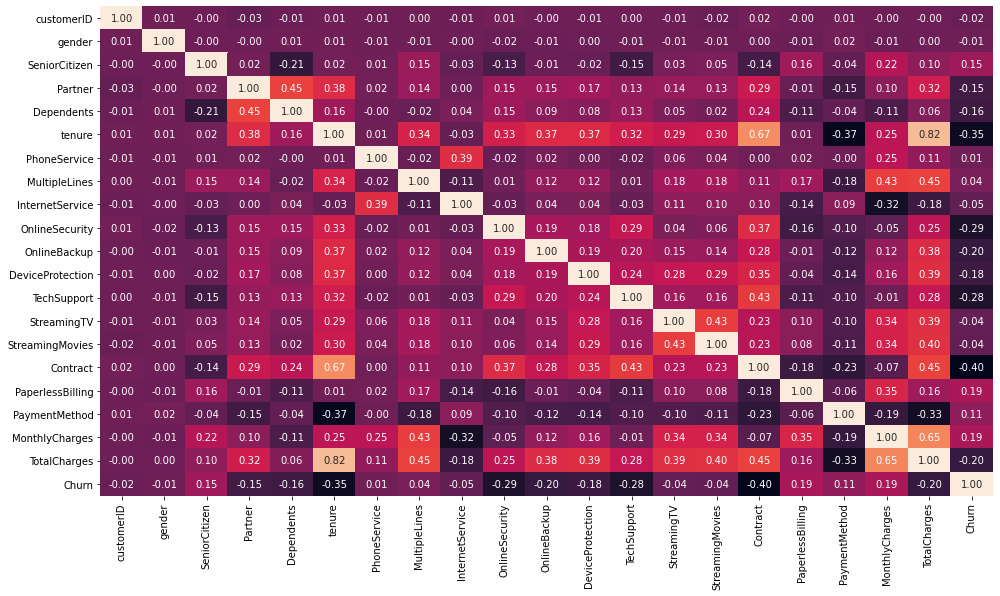

In [22]:
plt.figure(figsize=(16,9))
sns.heatmap(cc.corr(),annot=True,fmt='0.2f',cbar=False)
plt.show()

Above heatmap shows that ,'InternetService','StreamingMovies','StreamingTV','customerID','gender','PhoneService' and 
'MultipleLines'are less correlated with the target variable 'Churn.'

Feature Selection:-

In [23]:
# Drop the less correlated/non-relevant columns;

cc=cc.drop(['InternetService','StreamingMovies','StreamingTV','customerID','gender','PhoneService','MultipleLines'],axis=1)
cc

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,0,2,2,1,1,3,84.80,1990.50,0
7039,0,1,1,72,0,2,2,0,1,1,1,103.20,7362.90,0
7040,0,1,1,11,2,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,0,4,0,0,0,0,0,1,3,74.40,306.60,1


In [24]:
cc.shape

(7043, 14)

# Checking for the Skewness:-

In [28]:
cc.skew()

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

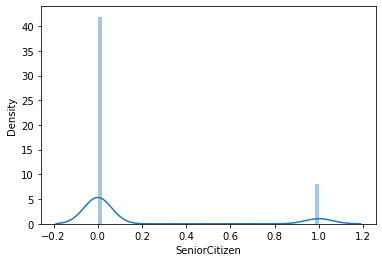

In [29]:
# checking with the distribution curve:-

sns.distplot(cc['SeniorCitizen'])
plt.show()

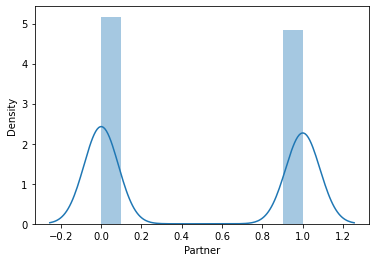

In [30]:
sns.distplot(cc['Partner'])
plt.show()

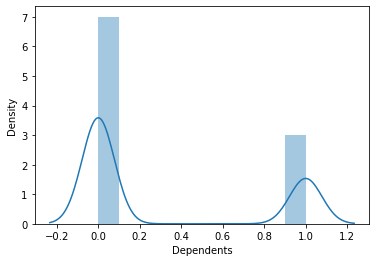

In [31]:
sns.distplot(cc['Dependents'])
plt.show()

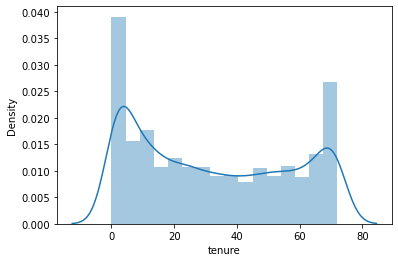

In [32]:
sns.distplot(cc['tenure'])
plt.show()

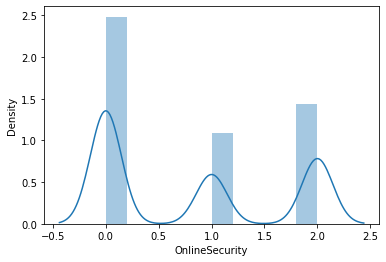

In [33]:
sns.distplot(cc['OnlineSecurity'])
plt.show()

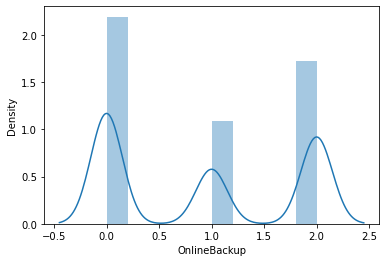

In [34]:
sns.distplot(cc['OnlineBackup'])
plt.show()

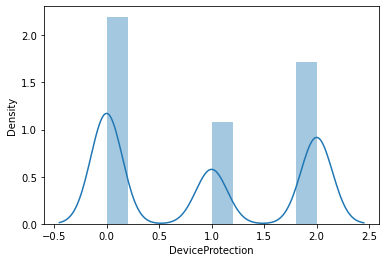

In [35]:
sns.distplot(cc['DeviceProtection'])
plt.show()

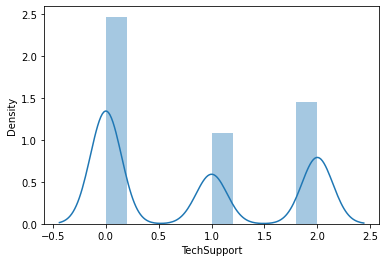

In [36]:
sns.distplot(cc['TechSupport'])
plt.show()

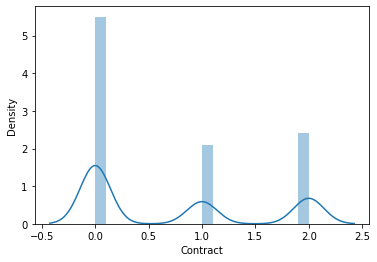

In [37]:
sns.distplot(cc['Contract'])
plt.show()

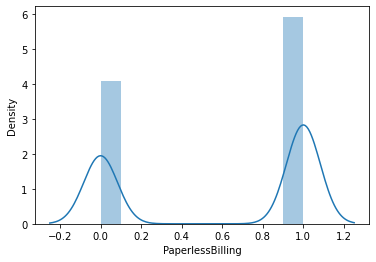

In [38]:
sns.distplot(cc['PaperlessBilling'])
plt.show()

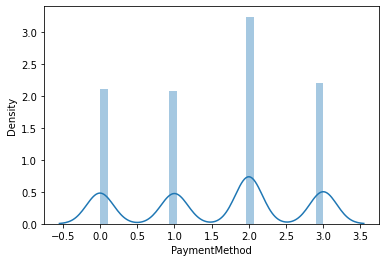

In [39]:
sns.distplot(cc['PaymentMethod'])
plt.show()

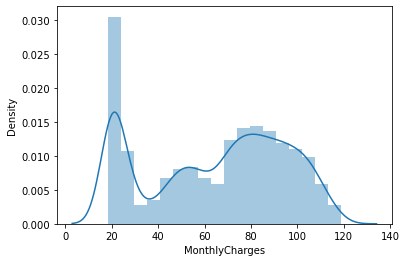

In [40]:
sns.distplot(cc['MonthlyCharges'])
plt.show()

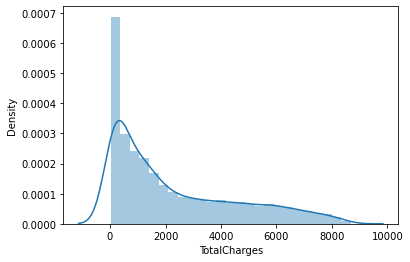

In [41]:
sns.distplot(cc['TotalCharges'])
plt.show()

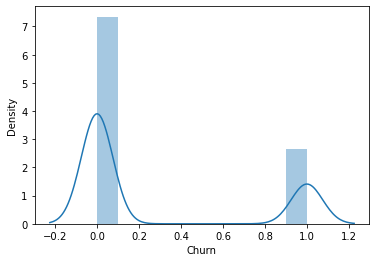

In [42]:
sns.distplot(cc['Churn'])
plt.show()

Above visualizations shows that the is not normalized.The building blocks is out of normalized curve.

# Outliers Removal:-

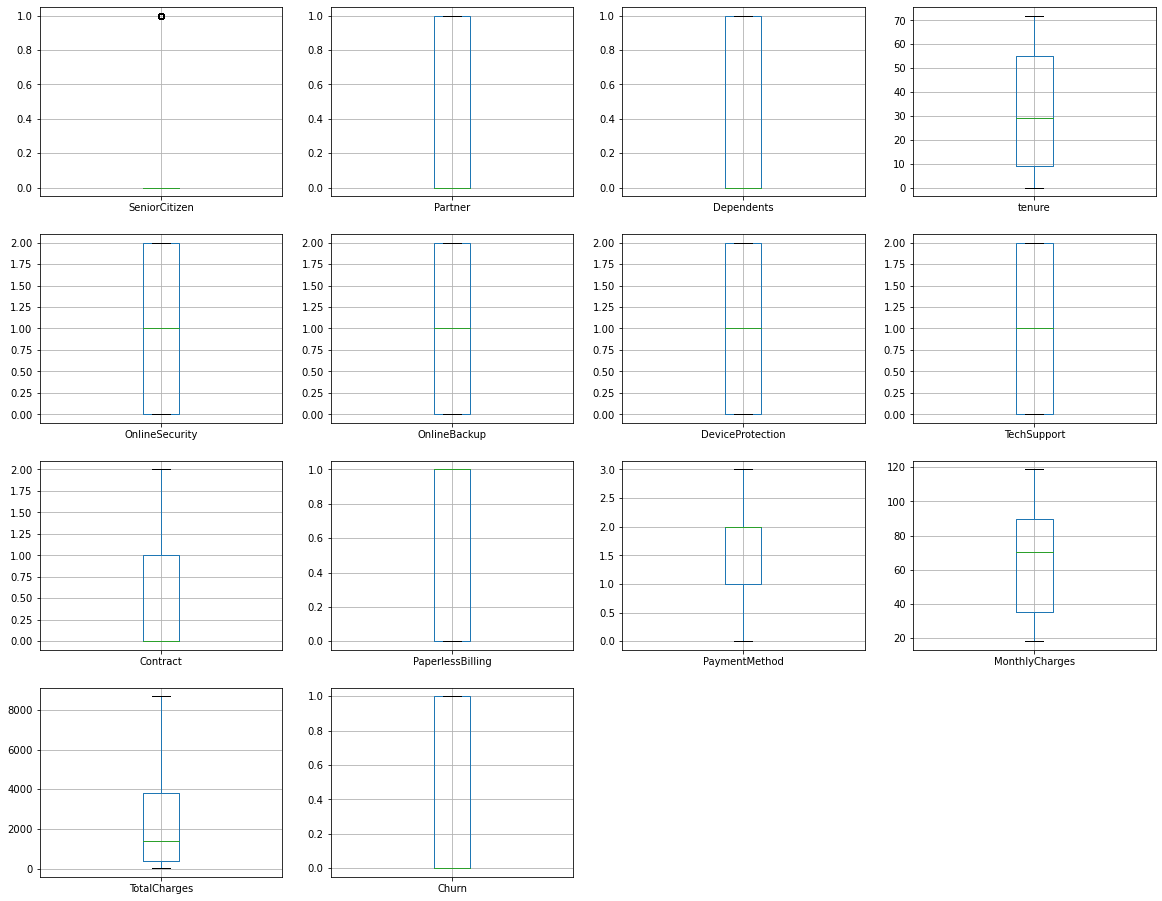

In [44]:
cc.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(cc))
z

array([[0.43991649, 1.03453023, 0.65401193, ..., 1.16032292, 0.99497138,
        0.60102348],
       [0.43991649, 0.96662231, 0.65401193, ..., 0.25962894, 0.17387565,
        0.60102348],
       [0.43991649, 0.96662231, 0.65401193, ..., 0.36266036, 0.96039939,
        1.66382851],
       ...,
       [0.43991649, 1.03453023, 1.5290241 , ..., 1.1686319 , 0.85518222,
        0.60102348],
       [2.27315869, 1.03453023, 0.65401193, ..., 0.32033821, 0.87277729,
        1.66382851],
       [0.43991649, 0.96662231, 0.65401193, ..., 1.35896134, 2.01391739,
        0.60102348]])

In [46]:
# index no.

np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

In [48]:
cc_new=cc[(z<3).all(axis=1)]
cc_new

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,0,2,2,1,1,3,84.80,1990.50,0
7039,0,1,1,72,0,2,2,0,1,1,1,103.20,7362.90,0
7040,0,1,1,11,2,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,0,4,0,0,0,0,0,1,3,74.40,306.60,1


Thus, our data is becoming biased as it is not considering the case of Senior Citizens. so, we will not consider/remove outliers.

In [49]:
cc.shape

(7043, 14)

In [50]:
cc_new.shape

(7043, 14)

In [52]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X=power_transform(cc,method='yeo-johnson')
X

array([[-0.43991649,  1.03453023, -0.65401193, ..., -1.1585412 ,
        -1.81058786, -0.60102348],
       [-0.43991649, -0.96662231, -0.65401193, ..., -0.23949171,
         0.25331304, -0.60102348],
       [-0.43991649, -0.96662231, -0.65401193, ..., -0.34266505,
        -1.38726921,  1.66382851],
       ...,
       [-0.43991649,  1.03453023,  1.5290241 , ..., -1.16724064,
        -0.85989943, -0.60102348],
       [ 2.27315869,  1.03453023, -0.65401193, ...,  0.33431207,
        -0.92296815,  1.66382851],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.33886338,
         1.48444325, -0.60102348]])

In [53]:
X.ndim

2

In [54]:
X.std()

1.0

In [55]:
x=cc_new.drop(['Churn'],axis=1)
x

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,0,2,2,1,1,3,84.80,1990.50
7039,0,1,1,72,0,2,2,0,1,1,1,103.20,7362.90
7040,0,1,1,11,2,0,0,0,0,1,2,29.60,346.45
7041,1,1,0,4,0,0,0,0,0,1,3,74.40,306.60


In [56]:
y=cc_new['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

# Oversampling to resolve imbalancing of the dataset:-

In [57]:
x.shape

(7043, 13)

In [58]:
y.shape

(7043,)

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [61]:
sm=SMOTE()
x_traint,y_traint=sm.fit_resample(x,y)

In [62]:
y_traint.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

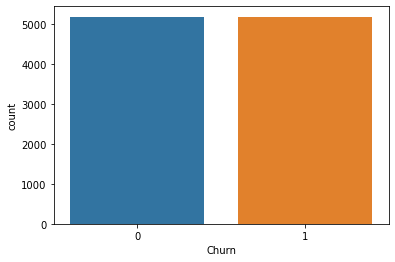

In [63]:
sns.countplot(y_traint)
plt.show()

# Machine Learning Algorithms Training and Testing Process:-

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [65]:
maxAccu=0 # Maximum accuracy
maxRS=0 # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_traint,y_traint,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc= accuracy_score(y_test,predlr)
    print('accuracy',acc,'random_state',i)
    print('\n')
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

accuracy 0.797584541062802 random_state 1


max_accuracy 0.797584541062802 max_random_state 1
accuracy 0.806280193236715 random_state 2


max_accuracy 0.806280193236715 max_random_state 2
accuracy 0.7888888888888889 random_state 3


accuracy 0.7893719806763285 random_state 4


accuracy 0.7898550724637681 random_state 5


accuracy 0.7874396135265701 random_state 6


accuracy 0.7884057971014493 random_state 7


accuracy 0.7951690821256039 random_state 8


accuracy 0.7864734299516908 random_state 9


accuracy 0.7985507246376812 random_state 10


accuracy 0.7971014492753623 random_state 11


accuracy 0.7898550724637681 random_state 12


accuracy 0.7845410628019324 random_state 13


accuracy 0.7811594202898551 random_state 14


accuracy 0.7792270531400967 random_state 15


accuracy 0.797584541062802 random_state 16


accuracy 0.7893719806763285 random_state 17


accuracy 0.7879227053140097 random_state 18


accuracy 0.797584541062802 random_state 19


accuracy 0.8019323671497585 random_stat

In [66]:
print('Best accuracy is ',maxAccu,'on Random_state',maxRS)

Best accuracy is  0.8130434782608695 on Random_state 56


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=56)

In [68]:
# Logistic Regression;

lr=LogisticRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 81.26330731014905
[[932 104]
 [160 213]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [69]:
# K-NearestNeighbors;

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_knn)*100)
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

Accuracy 78.92122072391767
[[974  62]
 [235 138]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1036
           1       0.69      0.37      0.48       373

    accuracy                           0.79      1409
   macro avg       0.75      0.66      0.67      1409
weighted avg       0.78      0.79      0.77      1409



In [70]:
# Decision Tree Classifier;

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 73.0305180979418
[[839 197]
 [183 190]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1036
           1       0.49      0.51      0.50       373

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



In [71]:
# Random Forest Classifier;

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 80.19872249822569
[[948  88]
 [191 182]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [72]:
# Ada Boost Classifier;

from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_ad)*100)
print(confusion_matrix(y_test,pred_ad))
print(classification_report(y_test,pred_ad))

Accuracy 81.05039034776436
[[940  96]
 [171 202]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [73]:
# Gradient Boost Classifier;

from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_gb)*100)
print(confusion_matrix(y_test,pred_gb))
print(classification_report(y_test,pred_gb))

Accuracy 80.8374733853797
[[948  88]
 [182 191]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.68      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



Therefore, Logistic Regression shows the best metrics results among other models.

In [74]:
# Cross Validation for logistic regression;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(lr,x_traint,y_traint,cv=9)
print('Cross validation score of Logistic Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predlr)*100)

Cross validation score of Logistic Regression model: [0.76173913 0.75478261 0.73217391 0.81565217 0.80956522 0.81043478
 0.8226087  0.81201044 0.83028721]
Mean of Cross validation score: 0.7943615746521866
Accuracy 81.26330731014905


In [75]:
# Cross Validation for Knn Classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(knn,x_traint,y_traint,cv=9)
print('Cross validation score of Knn model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_knn)*100)

Cross validation score of Knn model: [0.7173913  0.74173913 0.75304348 0.78782609 0.78086957 0.77826087
 0.77913043 0.78328982 0.79112272]
Mean of Cross validation score: 0.7680748224669215
Accuracy 78.92122072391767


In [76]:
# Cross Validation for decision tree classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(dt,x_traint,y_traint,cv=9)
print('Cross validation score of Decision Tree Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,preddt)*100)

Cross validation score of Decision Tree Classifier model: [0.72608696 0.70173913 0.7026087  0.83043478 0.82869565 0.84
 0.82782609 0.83899043 0.83637946]
Mean of Cross validation score: 0.792529021245107
Accuracy 73.0305180979418


In [77]:
# Cross Validation for Random Forest classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(rf,x_traint,y_traint,cv=9)
print('Cross validation score of Random Forest Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predrf)*100)

Cross validation score of Random Forest Classifier model: [0.73826087 0.74782609 0.73478261 0.87043478 0.8826087  0.88695652
 0.88086957 0.897302   0.89817232]
Mean of Cross validation score: 0.8374681617705798
Accuracy 80.19872249822569


In [78]:
# Cross Validation for AdaBoost classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(ad,x_traint,y_traint,cv=9)
print('Cross validation score of AdaBoost Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_ad)*100)

Cross validation score of AdaBoost Classifier model: [0.75826087 0.75043478 0.72695652 0.84521739 0.84       0.8426087
 0.85391304 0.85900783 0.85117493]
Mean of Cross validation score: 0.8141748968857608
Accuracy 81.05039034776436


In [79]:
# Cross Validation for GradientBoosting classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(gb,x_traint,y_traint,cv=9)
print('Cross validation score of GradientBoosting Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_gb)*100)

Cross validation score of GradientBoosting Classifier model: [0.74782609 0.75652174 0.72782609 0.85217391 0.85043478 0.86695652
 0.86869565 0.8772846  0.87467363]
Mean of Cross validation score: 0.8247103341279751
Accuracy 80.8374733853797


Therefore the difference between cv score and r2 score in very less in case of Logistic Regression that is [0.8126-0.8120=0.0006],So we will choose this model for further process.

# Hyperparameter Tuning:-

In [80]:
LogisticRegression()

LogisticRegression()

In [81]:
from sklearn.model_selection import GridSearchCV

parameters={'solver': ['liblinear','saga'],
            'penalty':['l1','l2'],
            'max_iter':[50,100,200],
            'multi_class' :['auto', 'ovr']}

In [82]:
GCV=GridSearchCV(estimator=LogisticRegression(),
                 param_grid=parameters,cv=8,
                scoring=accuracy_score)

In [83]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'max_iter': 50, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}

In [84]:
lr=LogisticRegression(max_iter=50,penalty='l1',solver='liblinear' ,multi_class='auto')
lr.fit(x_train,y_train)
train_accuracy=lr.score(x_train,y_train)
pred_decision=lr.predict(x_test)
print(train_accuracy)
accuracy=accuracy_score(y_test,pred_decision)
print('Accuracy_Score',accuracy)
lrs=cross_val_score(lr,x_traint,y_traint,cv=5)
lrc=lr.score(x_train,y_train)
print('Cross_Val_Score',lrc*100)

0.7978345757898474
Accuracy_Score 0.8076650106458482
Cross_Val_Score 79.78345757898474


In [85]:
GCV.best_estimator_

LogisticRegression(max_iter=50, penalty='l1', solver='liblinear')

# ROC AUC plot:-

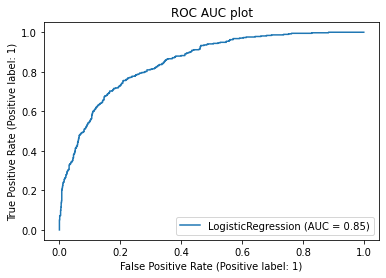

In [86]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

So, we are getting our model accuracy 81% and almost same cross-val-score which shows that 
our model is performing "good enough".

# Saving the Model:-

In [87]:
import pickle
filename='Customer_Churn_Pred.pkl'
pickle.dump(lr,open(filename,'wb'))

# Conclusion:-

In [88]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
Telecom_Churn=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
Telecom_Churn

,original,predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1404,0,0
1405,1,1
1406,0,0
1407,0,0


> In this project, we build various models like logistic regression, knn classifier, decision tree classifier, random forest classifier, adaboost classifier and gradientboosting classifier.


> A hyperparameter tuned logistic regression gives the highest accuracy score of 81% with almost same cross-validation score.